## Text Mining Project Pipeline
0. Read questionnaire data from csv file
1. Initialize raw corpus (for example, select Q1 answers only)
2. Text cleaning (NLTK library)
3. Text representation using BOW-tfidf model (Scikit-learn library)
4. Topic modeling
5. Clustering **[optional]**
6. Predictive modeling
7. Visualization and interpretation of final results

In [1]:
import pandas as pd  
import numpy as np 

In [2]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['font.size'] = 14

## 1) Read questionnaire data

In [3]:
# Read data from a CSV file : this will return a DataFrame object
df = pd.read_csv("QuestionnaireData_12Nov2018.csv")

In [4]:
df.head()

,Timestamp,Votre âge,Sexe,Etat civil,Niveau d'étude,Etablissement d'études,Situation professionnelle,Région,Domaine d'études,"Quel est le CODE de la personne qui vous a envoyé ce formulaire ? (Cela doit etre un nombre entre 1 et 52. Ecrire ""autre"" si vous ne l'avez pas)",Q1 : Qu'est-ce qui vous ferait rester en Tunisie ?,Q2 : Quel salaire vous fera rester en Tunisie ?,Q3 : Qu'est-ce qui encouragerait les étrangers à venir en Tunisie ?,Q4 : Qu'est-ce qui vous ferait partir à l'étranger ?,Q5 : Quelle est la différence au point de vue social entre la Tunisie et l'étranger ?,Q6 : Quelle est la différence au point de vue professionnel entre la Tunisie et l'étranger ?
0,11/2/2018 12:24,20-25,Homme,Célibataire,Mastère,A University not appearing in this list,Etudiant,Autre,Sciences de l'Ingénieur,Autre,Rien de rien,Pas une question de salaire,"Digitalisation de services, meilleure infrastr...","Plus de respect enver l'homme, meilleure quali...","Mediocrité mentale, pas de respect...","Au niveau de l hierarchie das les societes, Re..."
1,11/1/2018 16:07,31 et plus,Homme,Marié,Licence,ATFP,en chômage,Grand Tunis,biologie medical,23,Ma famille,1700 DT,je pense que le climat modéré qui séduit beauc...,je pense la recherche d opportunité,la tolérance,les perspectives d évolution
2,10/31/2018 10:48,20-25,Homme,Célibataire,Licence,Autre,Etudiant,Grand Tunis,Economie et gestion,3,Rien,30 000 dt,Tourisme,Mode de vie quotidienne,Mentalité,Respect
3,10/31/2018 13:03,20-25,Homme,Célibataire,Licence,CFT,Etudiant,Grand Tunis,Informatique,3,L'éspoir,900,"Bon, je serai pas d'accord sur ce point si il ...",Les codes d'étiques,Le respect et la dignité,L'assiduité
4,10/31/2018 19:29,20-25,Homme,Célibataire,Licence,Columbia University,Etudiant,Autre,Sciences humaines et sociales,44,La famille,"10,000 DT/mois",Le soleil,Meilleure education,La Tunisie pourrait devenir un peu plus toléra...,Le travail est plus complexe dans certains dom...


In [5]:
pd.DataFrame(df.iloc[:,15]).head(7)

,Q6 : Quelle est la différence au point de vue professionnel entre la Tunisie et l'étranger ?
0,"Au niveau de l hierarchie das les societes, Re..."
1,les perspectives d évolution
2,Respect
3,L'assiduité
4,Le travail est plus complexe dans certains dom...
5,Les marchés en tunisie ne sont pas assez grand...
6,"Difficulte, Inspecification, Retard dans tous ..."


In [6]:
pd.DataFrame(df.iloc[:,15].value_counts()).head(7)

,Q6 : Quelle est la différence au point de vue professionnel entre la Tunisie et l'étranger ?
je ne sais pas,3
Incomparable,2
Plus d'opportunités à l'étranger,2
Les opportunités,2
La rigueur,1
la façon avec laquelle on gère les choses / le concept de professionnalisme /,1
"Ce point là est un peu nuancé. Comparer les 2 au niveau professionnel serait difficie car les 2 peuvent nous apporter des opportunités professionnelles, comme on peut trouver des sociétés/startups au sein desquels on se sent mal à l'aise, maltraités, ou abusé.",1


****

## 2) Prepare corpus for analyzing Q6

Terminology:
- Corpus = list of documents
- Document = string (sequence of characters)

In [320]:
Q6_corpus = df.iloc[:,15].tolist()

In [321]:
import re
from nltk import FreqDist
from tabulate import tabulate

## 3) Data Cleaning using NLTK

The Pipeline:
1. Language identification
2. Remove useless characters
3. Convert to lowercase
4. Tokenization
5. Stemming

### Language identification


In [322]:
# Load library module for language identification
from nltk.classify.textcat import TextCat

# You will have to download some resources the first time that you use this library
import nltk
#nltk.download('crubadan')

In [323]:
# create class instance
tc = TextCat()

In [325]:
# quick test on first document in corpus
print(Q6_corpus[0])
print(tc.guess_language(Q6_corpus[0]))

Au niveau de l hierarchie das les societes, Rendement x 1000, l idee de "mosmar fi 7it"... 
eng


#  First method to identify Language

In [326]:
#import detectlanguage

#detectlanguage.configuration.api_key = "4b5995068d0483e35b610d91fd551e05"

# Enable secure mode (SSL) if you are passing sensitive data
# detectlanguage.configuration.secure = True

#detectlanguage.detect("Buenos dias señor")
#for doc in Q6_corpus:
 #   res1 =[detectlanguage.detect(doc)]
    #print(doc)

#  Second method to identify Language

In [327]:
res = [tc.guess_language(doc) for doc in Q6_corpus]

In [328]:
pd.Series(res).value_counts()

fra     212
eng       9
eng       6
cat       5
ita       4
lld       2
lat       2
abk       2
sun       2
pol       1
dan       1
lnc       1
nap       1
deu       1
rcf       1
ltz       1
ssw       1
kha       1
pih       1
src       1
bug       1
arb       1
epo       1
dtype: int64

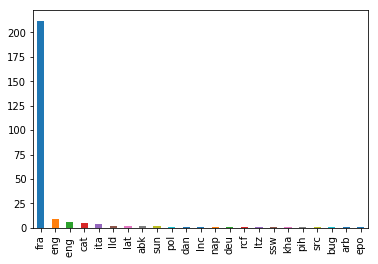

In [329]:
pd.Series(res).value_counts().plot(kind='bar')

In [330]:
[(res[i],doc) for i,doc in enumerate(Q6_corpus) if res[i] == 'fra']

[('fra', 'les perspectives d évolution '),
 ('fra', "L'assiduité"),
 ('fra',
  "Le travail est plus complexe dans certains domaines à l'étranger (La finance)"),
 ('fra',
  "Les marchés en tunisie ne sont pas assez grands comme a l'étranger, "),
 ('fra', 'Salaire et conditions humanitaires '),
 ('fra', 'Le carrière'),
 ('fra', 'sécurité des employés , motivation ,expérience et formation '),
 ('fra',
  "De point de vue études, en Tunisie, il y'a des écoles où on n’apprend pas de grande chose, alors qu'à l'étranger une bonne éducation est bien offerte.\n\nDe point de vue travail, à l'étranger, les gens respectent plus le sens du travail; l'horaire etc. A l'étranger, on peut facilement trouver un emploi qui correspond au diplôme d'études obtenu. Aussi, on peut travailler partout sans perdre du respect, il n y a pas de différence entre l'employeur et l'emlpoyé, ou encore entre le dirigeant et l'ouvrier; chacun est respecté par tout le monde!"),
 ('fra',
  "Les moyens d'enseignement et de l'

In [331]:
# a quick heuristic method for removing non-French documents from corpus
Q6_corpus_fr = [doc for i,doc in enumerate(Q6_corpus) if res[i] != 'eng']

In [332]:
doc_filter_1 = [res[i] != 'eng' for i,doc in enumerate(Q6_corpus)]
assert(np.sum(doc_filter_1) == len(Q6_corpus_fr))
doc_filter_1[0:5]

[False, True, True, True, True]

### Remove non-word characters + Convert to lowercase + Tokenize

In [333]:
# This tokenization method throws away all non-word characters (word characters = letters, digits, _ )
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer('[^_\W]+')

In [334]:
Q6_corpus_fr_words = [tokenizer.tokenize(doc.lower()) for doc in Q6_corpus_fr]

### Remove stopwords
We will use NLTK's default list of stop worsd for the French language.

In [335]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\alaa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [336]:
stop_words_fr = stopwords.words('french')

In [337]:
newStopWords = ['les','alors','alors' ,'au', 'aucuns' ,'aussi', 'autre', 'avant', 'avec', 'avoir', 'bon', 'car', 'ce', 'cela',
                'ces', 'ceux', 'chaque', 'ci', 'comme','comment' ,'dans', 'des', 'du' ,'dedans', 'dehors','depuis', 'devrait', 
                'doit', 'donc', 'dos', 'début', 'elle','elles', 'en' ,'encore' ,'essai', 'est','et' ,'eu', 'fait', 'faites', 
                'fois', 'font', 'hors', 'ici', 'il', 'ils', 'je','juste' ,'la', 'le', 'les', 'leur', 'là', 'ma', 'maintenant',
                'mais', 'mes', 'mine' ,'moins' ,'mon' ,'mot' ,'même', 'ni', 'nommés', 'notre', 'nous', 'ou', 'où', 'par',
                'parce', 'pas', 'peut' ,'peu', 'plupart', 'pour','pays', 'pourquoi', 'quand' ,'que', 'quel', 'quelle' ,'quelles' ,
                'quels', 'qui' ,'sa', 'sans' ,'ses', 'seulement', 'si', 'sien', 'son', 'sont', 'sous' ,'soyez', 'sujet',
                'sur', 'ta', 'tandis' ,'tellement', 'tels', 'tes' ,'ton' ,'tous', 'tout', 'trop', 'très' ,'tu', 'voient',
                'vont', 'votre', 'vous', 'vu', 'ça', 'étaient','état', 'étions', 'été', 'être','a','tunisie', 'tunisia',
                'tunis', 'bien', 'mieux', 'sais', 'leurs','certain','plus','ainsi','tunisiens',"professionnel"]

stop_words_fr.extend(newStopWords)

print(len(stop_words_fr))

287


In [338]:
print(stop_words_fr)

['au', 'aux', 'avec', 'ce', 'ces', 'dans', 'de', 'des', 'du', 'elle', 'en', 'et', 'eux', 'il', 'je', 'la', 'le', 'leur', 'lui', 'ma', 'mais', 'me', 'même', 'mes', 'moi', 'mon', 'ne', 'nos', 'notre', 'nous', 'on', 'ou', 'par', 'pas', 'pour', 'qu', 'que', 'qui', 'sa', 'se', 'ses', 'son', 'sur', 'ta', 'te', 'tes', 'toi', 'ton', 'tu', 'un', 'une', 'vos', 'votre', 'vous', 'c', 'd', 'j', 'l', 'à', 'm', 'n', 's', 't', 'y', 'été', 'étée', 'étées', 'étés', 'étant', 'étante', 'étants', 'étantes', 'suis', 'es', 'est', 'sommes', 'êtes', 'sont', 'serai', 'seras', 'sera', 'serons', 'serez', 'seront', 'serais', 'serait', 'serions', 'seriez', 'seraient', 'étais', 'était', 'étions', 'étiez', 'étaient', 'fus', 'fut', 'fûmes', 'fûtes', 'furent', 'sois', 'soit', 'soyons', 'soyez', 'soient', 'fusse', 'fusses', 'fût', 'fussions', 'fussiez', 'fussent', 'ayant', 'ayante', 'ayantes', 'ayants', 'eu', 'eue', 'eues', 'eus', 'ai', 'as', 'avons', 'avez', 'ont', 'aurai', 'auras', 'aura', 'aurons', 'aurez', 'auront',

In [339]:
Q6_corpus_fr_words_2 = [[word for word in doc  if word not in stop_words_fr] for doc in Q6_corpus_fr_words]

In [340]:
Q6_corpus_fr_words_2[0]  # the first document in the new corpus

['perspectives', 'évolution']

### Visualize distribution of word lengths
This is useful for getting ideas about stemming approach (in the next step) ...

In [341]:
# create list of all words in corpus
words = {word for doc in Q6_corpus_fr_words_2 for word in doc}
type(words),len(words)

(set, 722)

In [342]:
S = pd.Series([len(word) for word in words])

In [343]:
S.describe()

count    722.000000
mean       7.493075
std        2.902595
min        1.000000
25%        5.000000
50%        7.000000
75%        9.000000
max       19.000000
dtype: float64

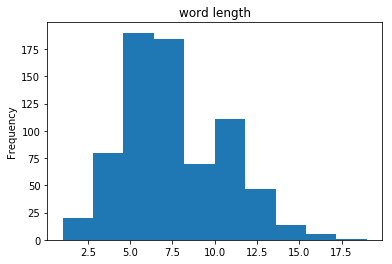

In [344]:
fig = S.plot(kind='hist', title="word length")

In [345]:
# which words have length <= 2
[word for word in words if len(word)<=2]

['vs',
 'to',
 '7',
 'fi',
 'up',
 'من',
 'و',
 'of',
 'ti',
 'w',
 '0',
 'f',
 'el',
 'so',
 'm1',
 '2',
 'we',
 'xd',
 '6',
 'in']

In [346]:
# words that contain more than 10 charcters
[word for word in words if len(word)>=10]

['nombreuses',
 'possibilité',
 'créativité',
 'professionnellement',
 'employeurs',
 'disponibles',
 'embauchement',
 'ingénieurs',
 'horizontal',
 'compétences',
 'respectueux',
 'experience',
 'correspond',
 'competences',
 'opportunités',
 'technicien',
 'valorisent',
 'technologiquement',
 'specialement',
 'discipliné',
 'travailleux',
 'exploitation',
 'maltraités',
 'amélioration',
 'concernant',
 'contrairement',
 'etrangeres',
 'equipements',
 'institutions',
 'reconaissance',
 'croissance',
 'ingénierie',
 'motivation',
 'environment',
 'investissements',
 'internationale',
 'territoire',
 'instabilite',
 'apprécient',
 'profesionnalisme',
 'bureaucratie',
 'introuvable',
 'conséquent',
 'compliquée',
 'management',
 'technologique',
 'meilleures',
 'perfection',
 'enseignement',
 'conscience',
 'coopération',
 'corruption',
 'challenging',
 'professionnels',
 'fournissent',
 'rémunération',
 'conditions',
 'oppertunistés',
 'respectent',
 'ingnieurie',
 'ponctualite',
 'admi

### Word normalization
- All stemming methods are heuristic; there is no best method.
- I will try two different methods: snowball method and my own quick method (see details below).

In [347]:
from nltk.stem.snowball import PorterStemmer

In [348]:
# Stemming method 1: Snowball method from NLTK
stemmer = PorterStemmer()
Q6_corpus_fr_words_3_1 = [[stemmer.stem(word) for word in doc] for doc in Q6_corpus_fr_words_2]

In [349]:
temp = [[word[0:len(word)-1] if (len(word)>=7 and word.endswith('s')) else word for word in doc] for doc in Q6_corpus_fr_words_2]

Q6_corpus_fr_words_3_2 = [[word[0:10] for word in doc] for doc in temp]

In [350]:
Q6_corpus_fr_words_2[0:5]

[['perspectives', 'évolution'],
 ['respect'],
 ['assiduité'],
 ['travail', 'complexe', 'certains', 'domaines', 'étranger', 'finance'],
 ['marchés', 'assez', 'grands', 'étranger']]

In [351]:
Q6_corpus_fr_words_3_1[0:5]

[['perspect', 'évolut'],
 ['respect'],
 ['assiduité'],
 ['travail', 'complex', 'certain', 'domain', 'étranger', 'financ'],
 ['marché', 'assez', 'grand', 'étranger']]

In [352]:
Q6_corpus_fr_words_3_2[0:20]

[['perspectiv', 'évolution'],
 ['respect'],
 ['assiduité'],
 ['travail', 'complexe', 'certain', 'domaine', 'étranger', 'finance'],
 ['marché', 'assez', 'grands', 'étranger'],
 ['difficulte',
  'inspecific',
  'retard',
  'domaine',
  'instabilit',
  'devise',
  'compliquee'],
 ['salaire', 'condition', 'humanitair'],
 ['carrière'],
 ['مافماش',
  'تكمبين',
  'و',
  'قفة',
  'و',
  'طلوع',
  'على',
  'ضهر',
  'غيرو',
  'و',
  'قلة',
  'احترام',
  'مابين',
  'بعضنا',
  'ترجمة',
  'غير',
  'متوفرة',
  'بلغة',
  'أخرى',
  'لأنها',
  'من',
  'صنع',
  'العرب',
  'فقط'],
 ['sécurité', 'employé', 'motivation', 'expérience', 'formation'],
 ['point',
  'vue',
  'études',
  'écoles',
  'apprend',
  'grande',
  'chose',
  'étranger',
  'bonne',
  'éducation',
  'offerte',
  'point',
  'vue',
  'travail',
  'étranger',
  'gens',
  'respectent',
  'sens',
  'travail',
  'horaire',
  'etc',
  'étranger',
  'facilement',
  'trouver',
  'emploi',
  'correspond',
  'diplôme',
  'études',
  'obtenu',
  'tr

### Visualize distribution of document lengths

In [353]:
L = [len(doc) for doc in Q6_corpus_fr_words_3_2]

In [354]:
pd.Series(L).describe()

count    249.000000
mean       5.317269
std        7.829312
min        0.000000
25%        2.000000
50%        3.000000
75%        6.000000
max       93.000000
dtype: float64

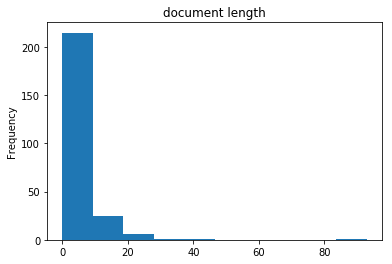

In [355]:
u = pd.Series(L).plot(kind='hist', title='document length')

In [356]:
pd.Series(L).value_counts().head(7)

1    49
2    41
3    37
5    23
4    21
6    15
0     9
dtype: int64

In [357]:
# Display documents that contain only one word
pd.Series([' '.join(doc) for doc in Q6_corpus_fr_words_2 if len(doc)==1]).value_counts().head(10)

professionnalisme    5
respect              3
salaire              3
incomparable         2
motivation           2
discipline           2
opportunités         2
opportunité          1
incomparables        1
commitment           1
dtype: int64

In [358]:
# Display documents that contain 2 words
pd.Series([' '.join(doc) for doc in Q6_corpus_fr_words_2 if len(doc)==2]).value_counts().head(10)

sérieux professionnalisme     2
opportunités étranger         2
technologie ingnieurie        1
ponctualité discipline        1
conscience professionnelle    1
option carriere               1
conditions travail            1
perspectives évolution        1
marché travail                1
valorisation compétences      1
dtype: int64

In [359]:
# Display documents that contain 3 words
pd.Series([' '.join(doc) for doc in Q6_corpus_fr_words_2 if len(doc)==3]).value_counts().head(10)

salaire conditions travail                2
respect travail groupe                    1
ponctualité conscience professionnelle    1
création liens sociaux                    1
jai intégré milieu                        1
respect règlements institutions           1
niveau études technologies                1
chose question precedente                 1
moyens financiers investis                1
application possibilité etranger          1
dtype: int64

******

### Visualize Distribution of Words

In [360]:
# we will compare the distribution of words of the following three different corpora.
fdist2 = FreqDist([c for c in [word for doc in Q6_corpus_fr_words_2 for word in doc]])
fdist3 = FreqDist([c for c in [word for doc in Q6_corpus_fr_words_3_1 for word in doc]])
fdist4 = FreqDist([c for c in [word for doc in Q6_corpus_fr_words_3_2 for word in doc]])

In [361]:
# total number of words in this corpus
fdist2.N(),fdist3.N(),fdist4.N()

(1324, 1324, 1324)

In [362]:
# number of UNIQUE words in this corpus
fdist2.B(),fdist3.B(),fdist4.B()

(722, 629, 669)

In [363]:
# 10 most frequent words in this corpus
fdist2.most_common(20)

[('travail', 56),
 ('étranger', 54),
 ('salaire', 30),
 ('respect', 23),
 ('professionnalisme', 20),
 ('opportunités', 14),
 ('sérieux', 13),
 ('conditions', 12),
 ('motivation', 11),
 ('salaires', 11),
 ('beaucoup', 9),
 ('recherche', 9),
 ('niveau', 9),
 ('environnement', 9),
 ('surtout', 8),
 ('carrière', 7),
 ('employés', 7),
 ('études', 7),
 ('entre', 7),
 ('ingénieur', 7)]

In [364]:
fdist3.most_common(20)

[('travail', 65),
 ('étranger', 55),
 ('salair', 41),
 ('respect', 26),
 ('professionnalism', 20),
 ('opportunité', 18),
 ('motiv', 15),
 ('condit', 13),
 ('sérieux', 13),
 ('grand', 12),
 ('professionnel', 12),
 ('employé', 9),
 ('beaucoup', 9),
 ('recherch', 9),
 ('niveau', 9),
 ('meilleur', 9),
 ('ingénieur', 9),
 ('compétenc', 9),
 ('environn', 9),
 ('domain', 8)]

In [365]:
fdist4.most_common(20)

[('travail', 56),
 ('étranger', 55),
 ('salaire', 41),
 ('profession', 35),
 ('respect', 23),
 ('opportunit', 18),
 ('condition', 13),
 ('sérieux', 13),
 ('motivation', 11),
 ('technologi', 10),
 ('employé', 9),
 ('beaucoup', 9),
 ('recherche', 9),
 ('niveau', 9),
 ('ingénieur', 9),
 ('compétence', 9),
 ('environnem', 9),
 ('domaine', 8),
 ('carrière', 8),
 ('grande', 8)]

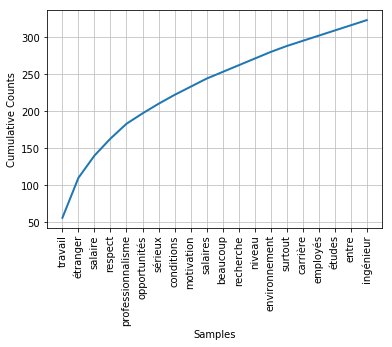

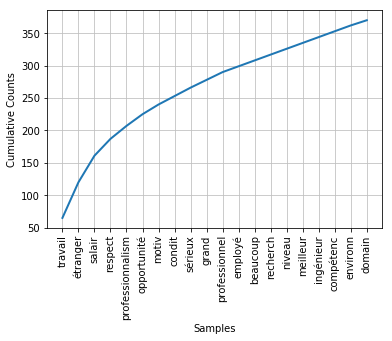

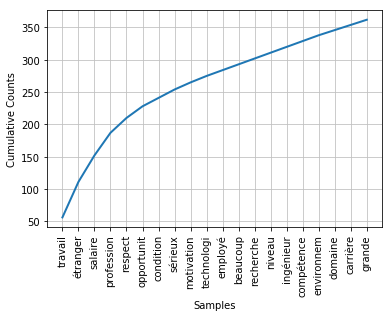

In [366]:
# cumulative frequency distribution of top 20 words in this corpus
fdist2.plot(20,cumulative=True)
fdist3.plot(20,cumulative=True)
fdist4.plot(20,cumulative=True)

******

## 4) Document representation with BOW-tfidf version

In [367]:
# setup the cleaned corpus
Q6_corpus_fr_clean = [' '.join(doc) for doc in Q6_corpus_fr_words_3_2]
type(Q6_corpus_fr_clean),type(Q6_corpus_fr_clean[0]), len(Q6_corpus_fr_clean)

(list, str, 249)

In [368]:
max_words = 50
maxdf = 0.9
mindf = 2

In [369]:
from sklearn.feature_extraction.text import CountVectorizer

In [370]:
tf_bow_model = CountVectorizer(max_df=maxdf, min_df=mindf, max_features=max_words, stop_words=stop_words_fr)

In [371]:
tf_bow_model.fit(Q6_corpus_fr_clean)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.9, max_features=50, min_df=2,
        ngram_range=(1, 1), preprocessor=None,
        stop_words=['au', 'aux', 'avec', 'ce', 'ces', 'dans', 'de', 'des', 'du', 'elle', 'en', 'et', 'eux', 'il', 'je', 'la', 'le', 'leur', 'lui', 'ma', 'mais', 'me', 'même', 'mes', 'moi', 'mon', 'ne', 'nos', 'notre', 'nous', 'on', 'ou', 'par', 'pas', 'pour', 'qu', 'que', 'qui', 'sa', 'se', 'ses', 'son', 's...'tunis', 'bien', 'mieux', 'sais', 'leurs', 'certain', 'plus', 'ainsi', 'tunisiens', 'professionnel'],
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [372]:
## verify the vocabulary (remember that each feature corresponds to one vocabulary word)
tf_bow_vocab = tf_bow_model.get_feature_names()
print(type(tf_bow_vocab))
print(len(tf_bow_vocab))
print(tf_bow_vocab)

<class 'list'>
50
['beaucoup', 'carrière', 'compétence', 'condition', 'différence', 'domaine', 'effort', 'employé', 'encouragem', 'entre', 'entreprise', 'environnem', 'etranger', 'expérience', 'faire', 'gens', 'grande', 'incomparab', 'ingénieur', 'manque', 'meilleur', 'motivation', 'moyens', 'niveau', 'nouvelle', 'opportunit', 'organisati', 'peux', 'point', 'ponctualit', 'profession', 'qualité', 'recherche', 'reconnaiss', 'respect', 'salaire', 'scientifiq', 'secteur', 'surtout', 'sérieux', 'technologi', 'travail', 'travailler', 'valeur', 'valorisati', 'valorisé', 'vie', 'vue', 'étranger', 'études']


In [373]:
tf_bow_model.stop_words_

{'500dt',
 'absence',
 'absent',
 'abusé',
 'accés',
 'acquérir',
 'actif',
 'adapté',
 'adem',
 'adhésion',
 'administra',
 'adorait',
 'ailleur',
 'aise',
 'ajouté',
 'ala',
 'allemagne',
 'amateur',
 'ambition',
 'améliorati',
 'and',
 'années',
 'ans',
 'applicatio',
 'applique',
 'apport',
 'apporter',
 'apprend',
 'apprentiss',
 'appréciati',
 'apprécient',
 'apprécié',
 'après',
 'archaïque',
 'argent',
 'assez',
 'assiduité',
 'attente',
 'aucun',
 'aucune',
 'autres',
 'avance',
 'avancement',
 'avancer',
 'avancé',
 'avancée',
 'avancéée',
 'avantage',
 'ayy',
 'bagri',
 'bas',
 'beacoup',
 'bel',
 'besoin',
 'biologie',
 'bonne',
 'bonnes',
 'boulot',
 'buisnes',
 'bureaucrat',
 'bénéfice',
 'cadre',
 'calson',
 'capital',
 'carière',
 'carriere',
 'cas',
 'castro',
 'causé',
 'celle',
 'censure',
 'certaine',
 'chacun',
 'challengin',
 'champs',
 'chance',
 'changement',
 'cher',
 'cherche',
 'chimie',
 'chine',
 'choix',
 'chomage',
 'chose',
 'choses',
 'chômage',
 'clair

In [374]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [375]:
tfidf_model = TfidfVectorizer(max_df=maxdf, min_df=mindf, max_features=max_words, stop_words=stop_words_fr, use_idf = True)
tfidf_model.fit(Q6_corpus_fr_clean)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.9, max_features=50, min_df=2,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=['au', 'aux', 'avec', 'ce', 'ces', 'dans', 'de', 'des', 'du', 'elle', 'en', 'et', 'eux', 'il', 'je', 'la', 'le', 'leur', 'lui', 'ma', 'mais', 'me', 'même', 'mes', 'moi', 'mon', 'ne', 'nos', 'notre', 'nous', 'on', 'ou', 'par', 'pas', 'pour', 'qu', 'que', 'qui', 'sa', 'se', 'ses', 'son', 's...'tunis', 'bien', 'mieux', 'sais', 'leurs', 'certain', 'plus', 'ainsi', 'tunisiens', 'professionnel'],
        strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [376]:
tfidf_vocab = tfidf_model.get_feature_names()
print(len(tfidf_vocab))
print(tfidf_vocab)

50
['beaucoup', 'carrière', 'compétence', 'condition', 'différence', 'domaine', 'effort', 'employé', 'encouragem', 'entre', 'entreprise', 'environnem', 'etranger', 'expérience', 'faire', 'gens', 'grande', 'incomparab', 'ingénieur', 'manque', 'meilleur', 'motivation', 'moyens', 'niveau', 'nouvelle', 'opportunit', 'organisati', 'peux', 'point', 'ponctualit', 'profession', 'qualité', 'recherche', 'reconnaiss', 'respect', 'salaire', 'scientifiq', 'secteur', 'surtout', 'sérieux', 'technologi', 'travail', 'travailler', 'valeur', 'valorisati', 'valorisé', 'vie', 'vue', 'étranger', 'études']


In [377]:
# Sort vocabulary words in ASCENDING order of IDF value (from most frequent to least frequent)
pd.DataFrame(dict(Word=vocab,IDF=tfidf_model.idf_)).sort_values("IDF", inplace=False, ascending = True).head(10)

,IDF,Word
48,2.589635,vivre
41,2.629641,tolérance
35,2.783791,service
30,2.937942,racisme
34,3.343407,salaire
25,3.577022,nouvelle
39,3.882404,surtout
3,3.882404,civisme
21,4.036554,meilleur
40,4.123566,sécurité


In [378]:
# compare vocabularies of TF model and TFIDF model
set(tfidf_vocab) - set(tf_bow_vocab)

set()

In [379]:
# Calculate DTM of our corpus
tfidf_dtm = tfidf_model.transform(Q6_corpus_fr_clean)

In [380]:
# Verify the type and size of this matrix
print(type(tfidf_dtm))
print(tfidf_dtm.shape)
# Number of non-zero values in this matrix
print(tfidf_dtm.nnz)

<class 'scipy.sparse.csr.csr_matrix'>
(249, 50)
492


In [381]:
# How many vocabulary terms are there in every document?
nb_terms_per_doc = np.array((tfidf_dtm>0).sum(axis=1))
print(type(nb_terms_per_doc))
print(nb_terms_per_doc.shape)
print(nb_terms_per_doc[0:10,0])

<class 'numpy.ndarray'>
(249, 1)
[0 1 0 3 1 1 2 1 0 3]


In [382]:
# In how many documents does each vocabulary term occur? -- Called the (absolute) document frequency (DF) of a term.
doc_freq = np.array((tfidf_dtm>0).sum(axis=0))
print(type(doc_freq))
print(doc_freq.shape)
print(doc_freq[0,0:10])

<class 'numpy.ndarray'>
(1, 50)
[ 8  8  9 13  7  8  5  9  6  6]


In [383]:
  # relative frequency i.e. proportion
rel_doc_freq = doc_freq / tfidf_dtm.shape[0]
print(type(rel_doc_freq))
print(rel_doc_freq.shape)
print(rel_doc_freq[0,0:5])

<class 'numpy.ndarray'>
(1, 50)
[0.03212851 0.03212851 0.03614458 0.05220884 0.02811245]


In [384]:
# put results in a data frame for easy visualization
u = pd.DataFrame(dict(word=tfidf_model.get_feature_names(),IDF=tfidf_model.idf_, df = doc_freq.ravel(), rel_df = rel_doc_freq.ravel()))
u.head()

,IDF,df,rel_df,word
0,4.324236,8,0.032129,beaucoup
1,4.324236,8,0.032129,carrière
2,4.218876,9,0.036145,compétence
3,3.882404,13,0.052209,condition
4,4.442019,7,0.028112,différence


In [385]:
u.sort_values("IDF", inplace=False, ascending = True).head()

,IDF,df,rel_df,word
48,2.589635,50,0.200803,étranger
41,2.629641,48,0.192771,travail
35,2.783791,41,0.164659,salaire
30,2.937942,35,0.140562,profession
34,3.343407,23,0.092369,respect


### Remove documents that contain 0 vocabulary words

In [386]:
nb_terms_per_doc = nb_terms_per_doc.ravel()  # convert to a 1D array
nb_terms_per_doc.shape

(249,)

In [387]:
pd.Series(nb_terms_per_doc.ravel()).value_counts()

1     77
0     55
2     40
3     34
4     16
5     10
7      7
6      7
11     1
9      1
8      1
dtype: int64

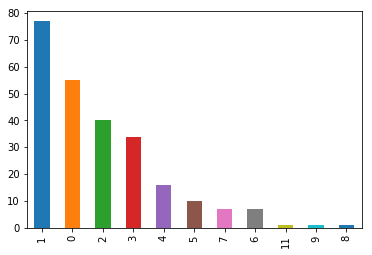

In [388]:
pd.Series(nb_terms_per_doc.ravel()).value_counts().plot(kind='bar')

In [389]:
idx = nb_terms_per_doc>0
tfidf_dtm_cropped = tfidf_dtm[nb_terms_per_doc>0,:]
Q6_corpus_fr_clean_cropped = [Q6_corpus_fr_clean[i] for i,x in enumerate(idx) if x]

In [390]:
doc_filter_2 = nb_terms_per_doc>0
assert(np.sum(doc_filter_2) == len(Q6_corpus_fr_clean_cropped))

In [391]:
print(tfidf_dtm.shape)
print(tfidf_dtm_cropped.shape)

(249, 50)
(194, 50)


In [392]:
print(len(Q6_corpus_fr_clean))
print(len(Q6_corpus_fr_clean_cropped))

249
194


In [393]:
# Show documents that were removed because they contain 0 vocabulary terms
[Q6_corpus_fr_clean[i] for i,x in enumerate(idx) if not x]

['perspectiv évolution',
 'assiduité',
 'مافماش تكمبين و قفة و طلوع على ضهر غيرو و قلة احترام مابين بعضنا ترجمة غير متوفرة بلغة أخرى لأنها من صنع العرب فقط',
 'image assez claire milieu pouvoir comparer',
 'commitment',
 'rien',
 '',
 '',
 'payés quoi',
 'profesionn',
 'ailleur savent valoriser apport humain',
 'option carriere',
 'facilité terme procédure',
 'corruption existe partout malheureus celle domine',
 '',
 'mentalité',
 '',
 'estimation potentiel',
 'shaabha mokho mlahhim w msattik tastika bagri felhin ken f smaan ala w castro w i3aytolo bel rap w m1 fi mokho ken calson taa mariem dabegh shaab tones yaarfsh kife i3ish hyeto w shaab tones specialeme rjel keno inajmo yaamlo population jdyda f tones ti ayy rajel ken inajjim ikon adem 2 0 adem rajil hawwa first human in earth w edha lkol fyn f el toilette taa darhom w howwa yitfarrij f mia khalifa wala yitfarrij f mariem dabbegh so shaab tones meshi ala roho we need to stand up really',
 'loin',
 'amateur',
 'evolution',
 'mérit

*****

## 5) Topic Modeling using LDA method
- **Input:** DTM matrix; corresponding vocabulary list; number of topics
- **Output:** LDA topics

In [469]:
dtm = tfidf_dtm_cropped
vocab = tfidf_vocab
Nb_Topics = 2

In [470]:
from sklearn.decomposition import LatentDirichletAllocation

In [471]:
# create instance of class
lda = LatentDirichletAllocation(n_components=Nb_Topics, learning_method='online', random_state=2019)
lda.fit(dtm)
assert(Nb_Topics == lda.components_.shape[0])
print(type(lda.components_))
print(lda.components_.shape)
lda.components_.sum(axis=1)
lda_doc_weights = lda.transform(dtm)

<class 'numpy.ndarray'>
(2, 50)


In [472]:
print(type(lda_doc_weights))
print(lda_doc_weights.shape)

<class 'numpy.ndarray'>
(194, 2)


In [473]:
# verify that the sum of each row = 1
lda_doc_weights.sum(axis=1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1.])

In [474]:
# select the first row of the lda.components_ matrix
x = lda.components_[0,:]

In [475]:
N = 10

print("Top 10 words for each topic:")
print()

for i in range(Nb_Topics):
    topic_weights = lda.components_[i,:]
    print ("Topic %d: " % (i), end='')
    print (" ".join([vocab[j]
                    for j in topic_weights.argsort()[:-N - 1:-1]]))
print()

Top 10 words for each topic:

Topic 0: étranger salaire respect opportunit condition technologi profession employé domaine carrière
Topic 1: travail profession compétence sérieux motivation etranger environnem étranger incomparab recherche



In [476]:
# The top 10 words and their weights in each topic
for i in range(0,Nb_Topics):
    print()
    print("Topic",i)
    print(pd.DataFrame(dict(term=vocab, topic_weight= lda.components_[i,:])).sort_values("topic_weight", ascending=False).head(10))


Topic 0
          term  topic_weight
48    étranger     18.386352
35     salaire     17.418917
34     respect     12.377918
25  opportunit     12.093256
3    condition      7.895024
40  technologi      6.899473
30  profession      6.836725
7      employé      5.228164
5      domaine      5.211751
1     carrière      5.061608

Topic 1
          term  topic_weight
41     travail     18.722081
30  profession     16.818920
2   compétence      6.582000
39     sérieux      6.328733
21  motivation      6.284594
12    etranger      5.972521
11  environnem      5.081693
48    étranger      4.655551
17  incomparab      4.632250
32   recherche      4.366025


#### Visualize topics as word clouds

In [477]:
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator
Max_Words = 30
wc = WordCloud(width = 1000, height = 500, min_font_size=4, max_words=Max_Words)

Topic 0


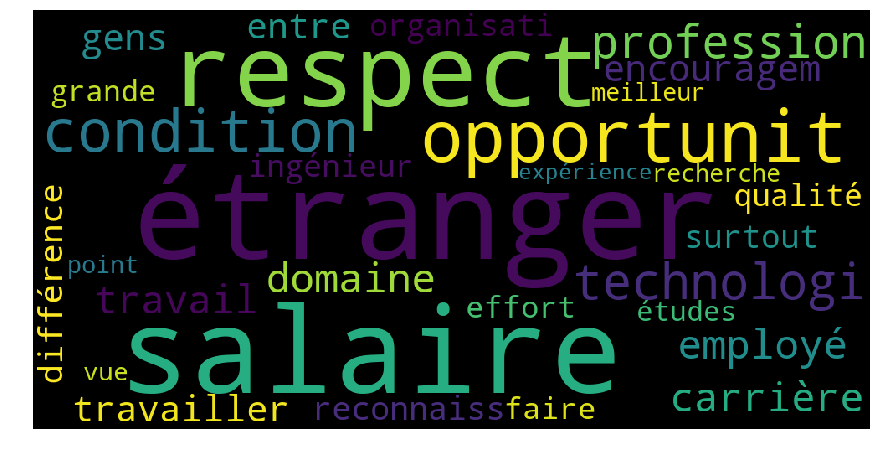

Topic 1


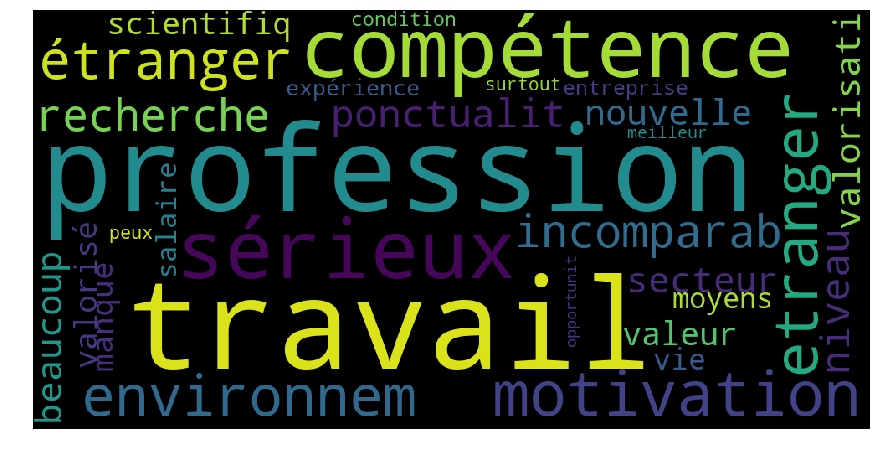

In [478]:
MaxFont = 150

for i in range(Nb_Topics):
    print("Topic",i)
    weighted_MF = int( MaxFont * np.max(lda.components_[i,:]) / np.max(lda.components_) )
    d = dict(zip(vocab, lda.components_[i,:]))
    z = wc.generate_from_frequencies(d, max_font_size=weighted_MF)
    plt.figure(figsize=(15,8))
    plt.imshow(z)
    plt.axis("off")
    plt.show()

### Naming the Topics

In [491]:
topic_names = ['Salaire', 'Conditions du travail']

### Understand and Interpret Document Weights

#### Visualize documents as points in topic space

Text(0,0.5,'Conditions')

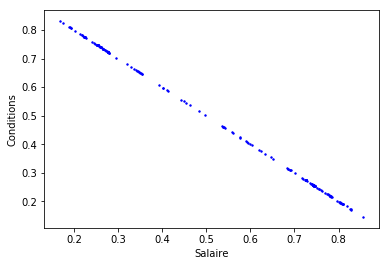

In [492]:
plt.scatter(lda_doc_weights[:,0],lda_doc_weights[:,1],s=2, marker="o",color='blue')
plt.xlabel('Salaire')
plt.ylabel('Conditions')

Text(0,0.5,'Conditions')

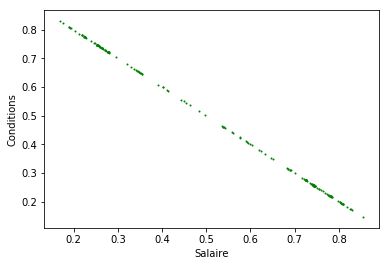

In [493]:
plt.scatter(lda_doc_weights[:,0],lda_doc_weights[:,1],s=1, marker="o",color='green')
plt.xlabel('Salaire')
plt.ylabel('Conditions')

#### Visualize dominant topic of documents
We define the 'dominant' topic of a document as the topic with the largest weight value for that document.

In [494]:
dom_topic_weights = pd.Series(np.max(lda_doc_weights,axis=1))
dom_topic_labels = pd.Series(np.argmax(lda_doc_weights,axis=1))

In [495]:
dom_topic_labels.value_counts()

0    103
1     91
dtype: int64

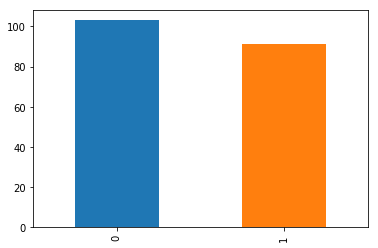

In [496]:
dom_topic_labels.value_counts().plot(kind='bar')

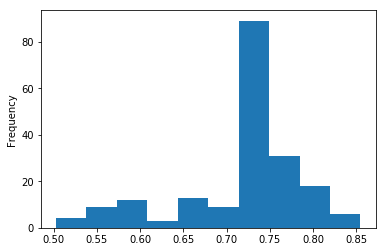

In [497]:
dom_topic_weights.plot(kind='hist')

In [498]:
dom_topic_weights.describe()

count    194.000000
mean       0.719759
std        0.073309
min        0.502710
25%        0.700980
50%        0.741256
75%        0.760245
max        0.854627
dtype: float64

In [499]:
np.sum((dom_topic_weights>.66) & (dom_topic_weights<.67))

1

In [500]:
# How many documents have a clearly dominant topic?
np.sum(dom_topic_weights>=0.666)

154

In [501]:
# How many documents do not have a clearly dominant topic
np.sum(dom_topic_weights<=0.5)

0

In [502]:
# Which documents do not have a clearly dominant topic
for i,x in enumerate(dom_topic_weights):
    if x<=0.5:
        print(lda_doc_weights[i,:],Q6_corpus_fr_clean_cropped[i])

### Label each document with corresponding dominant topic

In [503]:
# create a new column and initialize all its elements to 'Unknown'
df['Q6_category'] = "Unknown"

In [504]:
len(doc_filter_1),len(doc_filter_2),len(dom_topic_labels)

(258, 249, 194)

In [505]:
j = 0
k = 0
for i in range(df.shape[0]):
    if doc_filter_1[i]:
        if doc_filter_2[j]:
            df.loc[i,'Q6_category'] = topic_names[dom_topic_labels[k]]
            k=k+1
        j=j+1

In [506]:
np.sum(doc_filter_1),j

(249, 249)

In [507]:
np.sum(doc_filter_2),k

(194, 194)

In [508]:
df['Q6_category'].value_counts()

Salaire                  103
Conditions du travail     91
Unknown                   64
Name: Q6_category, dtype: int64

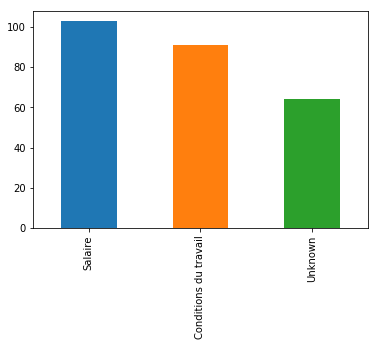

In [509]:
df['Q6_category'].value_counts().plot(kind='bar')

*****

## 6) Document Clustering

In [510]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [511]:
dtm = tfidf_dtm_cropped

### a) Using BOW feature vectors

In [512]:
km = KMeans(n_clusters=2, random_state=10)
km.fit(dtm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=10, tol=0.0001, verbose=0)

In [513]:
# Sum of Squared Distances:
km.inertia_

163.87305706580466

In [514]:
# Number of documents in each cluster
pd.Series(km.labels_).value_counts()

0    165
1     29
dtype: int64

### Elbow method

In [515]:
K_values = range(1,11)
Sum_of_squared_distances = []   
for k in K_values:  
    km = KMeans(n_clusters=k, random_state=10)  
    km.fit(dtm) 
    Sum_of_squared_distances.append(km.inertia_)

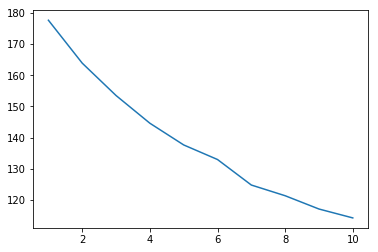

In [516]:
plt.plot(K_values,Sum_of_squared_distances)

### b) Using LDA weights

In [517]:
# create instance of KMeans class
km2 = KMeans(n_clusters=2, random_state=10)

# run kMeans algorithm
km2.fit(lda_doc_weights)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=10, tol=0.0001, verbose=0)

In [518]:
# Determine the value of SSD (Sum of Squared Distances)
km2.inertia_

2.0687956377947296

In [519]:
# Number of documents in each cluster
pd.Series(km2.labels_).value_counts()

0    103
1     91
dtype: int64

### Elbow method
Use the 'elbow' method in order to find best number of clusters.

In [520]:
K_values = range(1,11)
Sum_of_squared_distances2 = []
for k in K_values:
    km_ = KMeans(n_clusters=k, random_state=6724)   # create instance of KMeans class
    km_.fit(lda_doc_weights)
    Sum_of_squared_distances2.append(km_.inertia_)

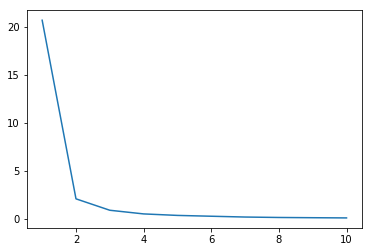

In [521]:
# plot the SSD curve
plt.plot(K_values,Sum_of_squared_distances2)
#plt.ylim([0, 50])

On remarque que le nombre de clusters est égale à 2.

****

### Conclusion: Topic Modeling vs. Clustering
Based on the above results:


LDA est la methode la plus adéquate to cluster the documents in this corpus.
Each cluster represent a topic.

*****

## 7) Predictive Modeling
We would like to extract a predictive model of the form: ``Q1_category = f(other non-text attributes)`` which will help us understand how the answers vary based on the characteristics of the respondent.

Instructions:
- You should use the following 8 predictor attributes which are all **categorical**: 'Votre âge', 'Sexe', 'Etat civil', 'Niveau d'étude', 'Etablissement d'études', 'Situation professionnelle', 'Région', 'Domaine d'études'.
- The ``Timestamp`` attribute is obviously useless and that is why I do not incude it in the model.
- Because the attributes 'Etablissement d'études' and 'Domaine d'études' have a large number of unique values, you should reduce their number of values to only 5 values by aggregating the least frequent values to a single category called 'Other'.
- After training this model, determine which of the 8 attributes are the best predictors of the Q1_category, based on the parameter values of this model.
- You should use either the **logistic regression** or **random forest** method to approximate the function ``f``.

#### a) Prepare data

In [522]:
df2 = df.copy()

In [523]:
df2.columns[0:9]

Index(['Timestamp', 'Votre âge', 'Sexe', 'Etat civil', 'Niveau d'étude',
       'Etablissement d'études', 'Situation professionnelle', 'Région',
       'Domaine d'études'],
      dtype='object')

In [524]:
df2.dtypes[1:9]

Votre âge                    object
Sexe                         object
Etat civil                   object
Niveau d'étude               object
Etablissement d'études       object
Situation professionnelle    object
Région                       object
Domaine d'études             object
dtype: object

In [525]:
df2.iloc[:,1:9].head()

,Votre âge,Sexe,Etat civil,Niveau d'étude,Etablissement d'études,Situation professionnelle,Région,Domaine d'études
0,20-25,Homme,Célibataire,Mastère,A University not appearing in this list,Etudiant,Autre,Sciences de l'Ingénieur
1,31 et plus,Homme,Marié,Licence,ATFP,en chômage,Grand Tunis,biologie medical
2,20-25,Homme,Célibataire,Licence,Autre,Etudiant,Grand Tunis,Economie et gestion
3,20-25,Homme,Célibataire,Licence,CFT,Etudiant,Grand Tunis,Informatique
4,20-25,Homme,Célibataire,Licence,Columbia University,Etudiant,Autre,Sciences humaines et sociales


In [526]:
# verify the number of distinct values in each predictor attribute
df2.iloc[:,1:8].nunique(axis=0)

Votre âge                     3
Sexe                          2
Etat civil                    2
Niveau d'étude                3
Etablissement d'études       83
Situation professionnelle     3
Région                        4
dtype: int64

In [527]:
df2['Votre âge'].value_counts()

20-25         208
26-30          34
31 et plus     16
Name: Votre âge, dtype: int64

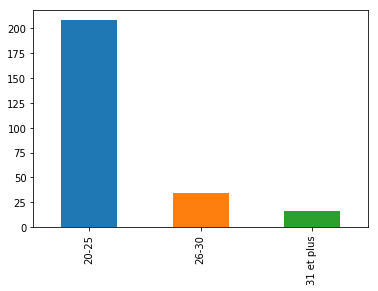

In [528]:
df2['Votre âge'].value_counts().plot(kind='bar')

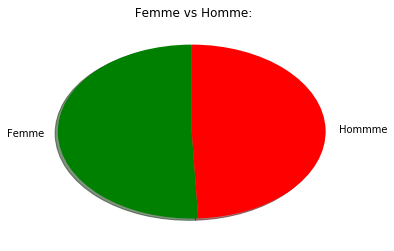

In [529]:
from collections import Counter
sent = df2["Sexe"]

## use Counter to count how many times each sentiment appears
## and save each as a variable
counter = Counter(sent)
positive = counter['Femme']
negative = counter['Homme']

## declare the variables for the pie chart, using the Counter variables for “sizes”
labels = 'Femme', 'Hommme'
sizes = [positive, negative]
colors = ['green', 'red']
yourtext = "Femme vs Homme:"

## use matplotlib to plot the chart
plt.pie(sizes, labels = labels, colors = colors, shadow = True, startangle = 90)
plt.title(" "+yourtext)
plt.show()

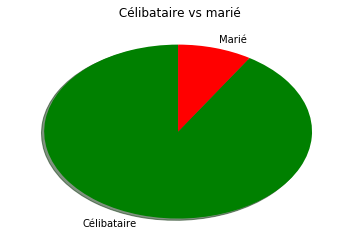

In [530]:
from collections import Counter
sent = df2["Etat civil"]

## use Counter to count how many times each sentiment appears
## and save each as a variable
counter = Counter(sent)
positive = counter['Célibataire']
negative = counter['Marié']

## declare the variables for the pie chart, using the Counter variables for “sizes”
labels =  'Célibataire', 'Marié'
sizes = [positive, negative]
colors = ['green', 'red']
yourtext = "Célibataire vs marié"

## use matplotlib to plot the chart
plt.pie(sizes, labels = labels, colors = colors, shadow = True, startangle = 90)
plt.title(" "+yourtext)
plt.show()

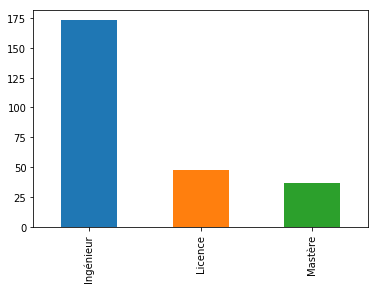

In [531]:
df2['Niveau d\'étude'].value_counts().plot(kind='bar')

In [532]:
df2['Région'].value_counts()

Grand Tunis    175
Autre           62
Sfax            12
Sousse           9
Name: Région, dtype: int64

In [533]:
# The "Etablissement d'études" attribute also has too many distinct values!
df2['Etablissement d\'études'].value_counts()

INSAT                                                 86
ENIT                                                  38
FST                                                   14
ESSAI                                                 11
ENSI                                                   6
ESPRIT                                                 6
ISSHT                                                  5
Issht                                                  3
ENSIT                                                  3
ISI                                                    3
Esprit                                                 3
INAT                                                   3
ESSECT                                                 2
FSB                                                    2
ENIM                                                   2
ISG                                                    2
ULT                                                    2
Sup'Com                        

In [534]:
# Let's reduce the number of values of the "Etablissement d'études" attribute
df2.loc[~df2['Etablissement d\'études'].isin(['INSAT', 'ENIT','FST','ESSAI']),'Etablissement d\'études'] = 'Other'
df2['Etablissement d\'études'].value_counts()

Other    109
INSAT     86
ENIT      38
FST       14
ESSAI     11
Name: Etablissement d'études, dtype: int64

In [535]:
# The "Domaine d'études" attribute also has too many distinct values!
df2['Domaine d\'études'].value_counts()

Sciences de l'Ingénieur                        181
Sciences humaines et sociales                   14
Economie et gestion                             12
Médecine                                         5
Informatique                                     4
Réseaux informatiques et télécommunications      2
Pharmacie                                        2
Biologie industrielle                            2
statistiques                                     1
Informatique industrielle                        1
Artistique                                       1
Santé                                            1
Agronomie                                        1
Sciences de l'informatique                       1
biologie medical                                 1
Informatique (Génie Logiciel)                    1
Biologie                                         1
Informatique(développement)                      1
BIOLOGIE                                         1
Droit                          

In [536]:
# Let's reduce the number of distinct values of the "Domaine d'études" attribute to only 2
# You can use a different way of doing this (for example, reduce to 5 values instead of 2)
df2.loc[df2['Domaine d\'études'] != 'Sciences de l\'Ingénieur', 'Domaine d\'études'] = 'Other'

In [537]:
# verify the number of distinct values in each predictor attribute
df2.iloc[:,1:9].nunique(axis=0)

Votre âge                    3
Sexe                         2
Etat civil                   2
Niveau d'étude               3
Etablissement d'études       5
Situation professionnelle    3
Région                       4
Domaine d'études             2
dtype: int64

In [538]:
df2['Domaine d\'études'].value_counts()

Sciences de l'Ingénieur    181
Other                       77
Name: Domaine d'études, dtype: int64

#### b) Pattern extraction


#Check the independence between the independent variables

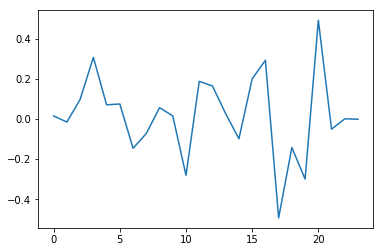

In [541]:
res_class = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial').fit(data3, df2['Q6_category'])
res_class.coef_[1]
plt.plot(res_class.coef_[1])

## Visualization and interpretation of results

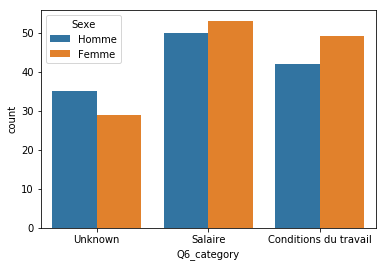

In [542]:
import seaborn as sns
sns.countplot(x='Q6_category',hue='Sexe',data=df2)

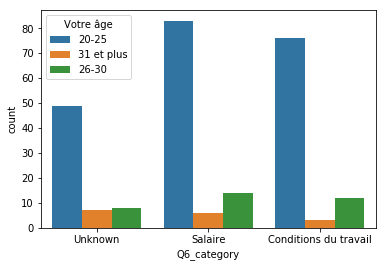

In [543]:
sns.countplot(x='Q6_category',hue='Votre âge',data=df2)

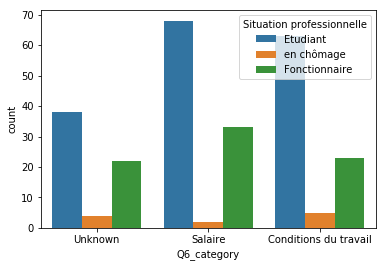

In [544]:
sns.countplot(x='Q6_category',hue='Situation professionnelle',data=df2)

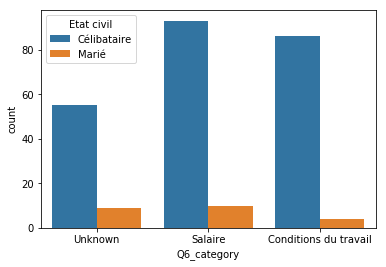

In [549]:
sns.countplot(x='Q6_category',hue="Etat civil",data=df2)

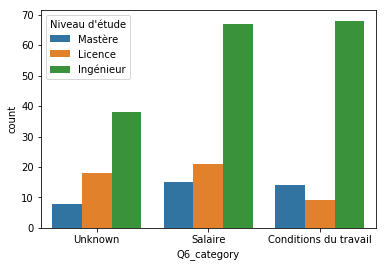

In [546]:
sns.countplot(x='Q6_category',hue="Niveau d'étude",data=df2)

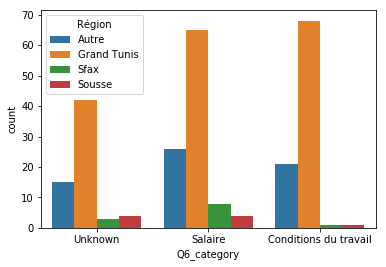

In [548]:
sns.countplot(x='Q6_category',hue="Région",data=df2)